In [1]:
# ref: optimistic_initial_values.py

In [2]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


In [3]:
class Bandit:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 1

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [4]:
def run_experiment(m1, m2, m3, N, upper_limit=10):
    bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

    data = np.empty(N)
    
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average

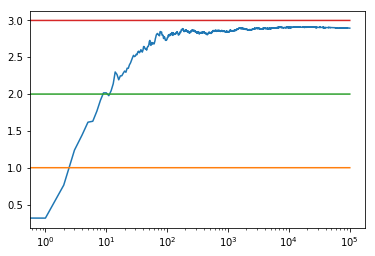

0.99531522305
2.00385948946
2.994640651


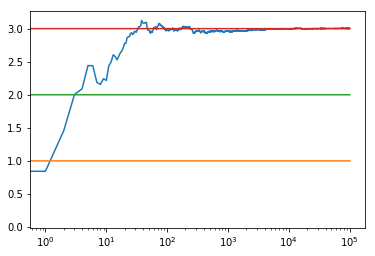

2.51457491071
2.7756001495
3.00293076478


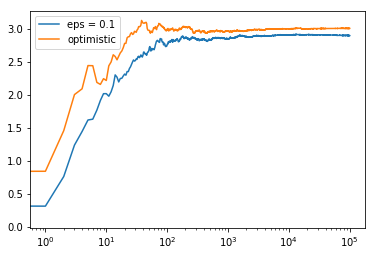

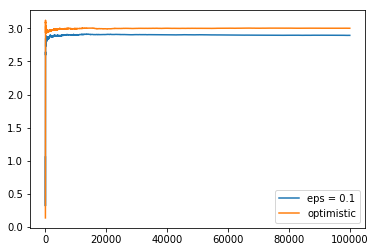

In [5]:
if __name__ == '__main__':
    c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
    oiv = run_experiment(1.0, 2.0, 3.0, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.show()